In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [16]:
# load data
df = pd.read_csv('../data/churn.csv')

In [17]:
# first five observations
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
# shape of data
df.shape

(14999, 10)

In [19]:
# information about data types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [20]:
# check for presence of null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [21]:
# Why employees leave their jobs?
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [22]:
# Why employees leave their jobs?
pd.DataFrame(df.groupby(['left', 'salary'])['salary'].count())

salary
left salary        
0    high      1155
     low       5144
     medium    5129
1    high        82
     low       2172
     medium    1317

## Takeaways:
Employees who left the company have:
- Lower satisfaction levels
- Lower promotion rates
- Spend more time on their jobs
- Lesser salary

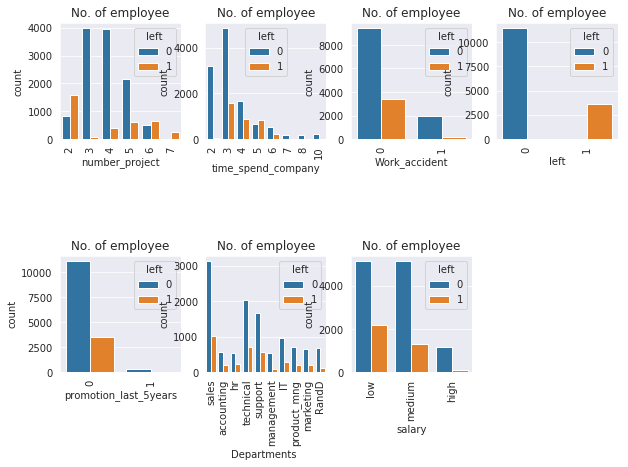

In [23]:
# Feature-wise distribution of Employees leaving vs Employees staying


features=['number_project','time_spend_company','Work_accident','left', 
          'promotion_last_5years','Departments ','salary']


fig = plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 4, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

## Key takeaways

- **Less projects**: Employees with less number of projects (less than 3) are prone to leave.
- **Fatigue**: Employees with more than 5 projects are also prone to leave the organization.
- **Loyalty**: Employees with less than 3 years experience stay (time of learning) and those with more than 5 years are extremely loyal.
- **Promotion**: No promotion increases the chances of leaving
- **Departments**: `Sales`, `Technical` and `Support` teams have the highest number of employees leaving
- **Salary**: Employees with salary brackets in `low` and `medium` have higher chances of leaving

In [24]:
# Data preprocessing

# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
df['salary']=le.fit_transform(df['salary'])
df['Departments ']=le.fit_transform(df['Departments '])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [25]:
# Spliting data into features and targets
X = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]
y = df['left']

In [26]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)  
# 70% training and 30% test

In [27]:
# Model building

# import packages
from sklearn.linear_model import LogisticRegression

# initialize Logistic Regression model
logreg = LogisticRegression(random_state=2, class_weight={0:0.24, 1:0.76})

# Fit model on training data
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

/home/bick23/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
# Evaluate predictions

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print('='*20)

print(accuracy_score(y_test, y_pred))
print('='*20)

print(precision_score(y_test, y_pred))
print('='*20)

print(recall_score(y_test, y_pred))
print('='*20)

print(roc_auc_score(y_test, y_pred))

[[2083  734]
 [ 190  743]]
0.7536
0.5030467163168585
0.7963558413719185
0.7678974805013657
